In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Visadataset.csv')
df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Box plot**

- box plot is used for detecting outliners
- box plot has min q1 q2 q3  and max values
- inside plot red line represents median which 50 percentile

- mild outliners
    - q1-1.5*IQR and q3+1.5*IQR
- strong outliners
    - q1-3*IQR and q3+3*IQR
- IQR: inter quartile range
    - IQR = Q3-Q1
- q1=25p
- q2=50p
- q3=75p

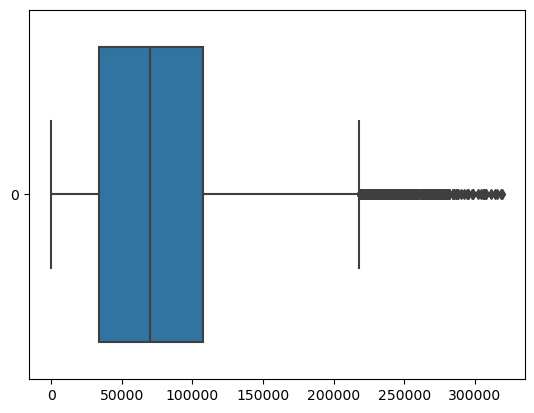

In [14]:
sns.boxplot(df['prevailing_wage'],orient='h')
plt.show()

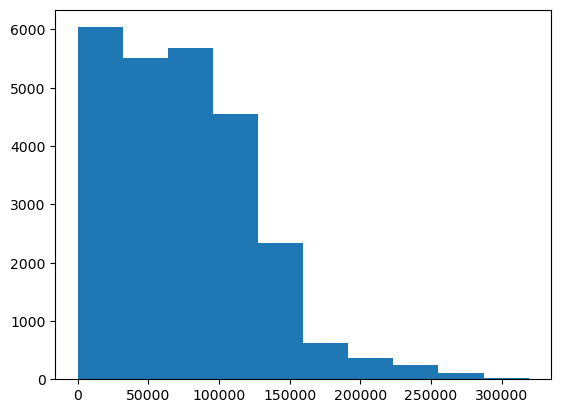

In [9]:
plt.hist(df['prevailing_wage'])
plt.show()

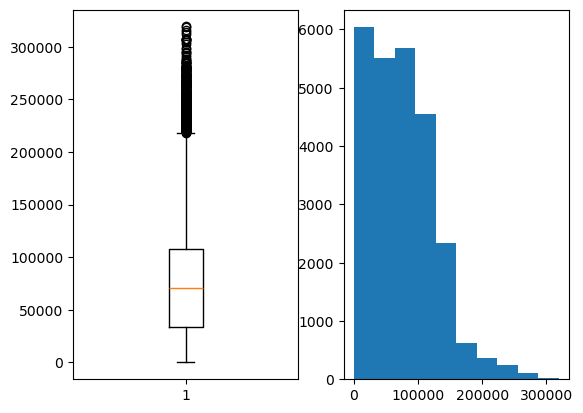

In [16]:

plt.subplot(1,2,1).boxplot(df['prevailing_wage'])
plt.subplot(1,2,2).hist(df['prevailing_wage'])
plt.show()

- outliners are available less than q1-1.5*IQR and greater than q3+1.5*IQR

- step-1:
    - calculate: Q1: 25p
    - calculate: Q3: 75p
    - calculate: IQR: Q3-Q1
- step-2:
    - LB:Q1-1.5*IQR 
    - uB:Q3+1.5*IQR
- step-3:
    - con1=df['prevailing_wage']>LB
    - con2=df['prevailing_wage']<UB
    - apply and 

In [18]:
Q1= round(np.percentile(df['prevailing_wage'],25),2)
Q3= round(np.percentile(df['prevailing_wage'],75),2)
IQR = Q3-Q1
LB = Q1-1.5*IQR
UB = Q3+1.5*IQR
con1=df['prevailing_wage']>LB
con2=df['prevailing_wage']<UB
non_outliners = df[con1&con2]
len(non_outliners)

25053

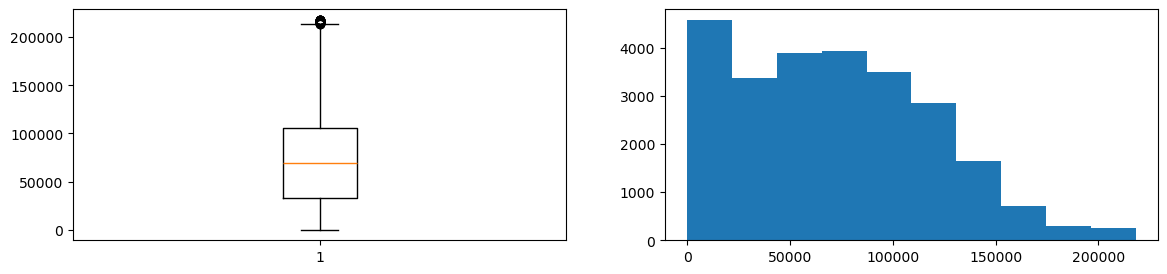

In [24]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1).boxplot(non_outliners['prevailing_wage'])
plt.subplot(1,2,2).hist(non_outliners['prevailing_wage'])
plt.show()

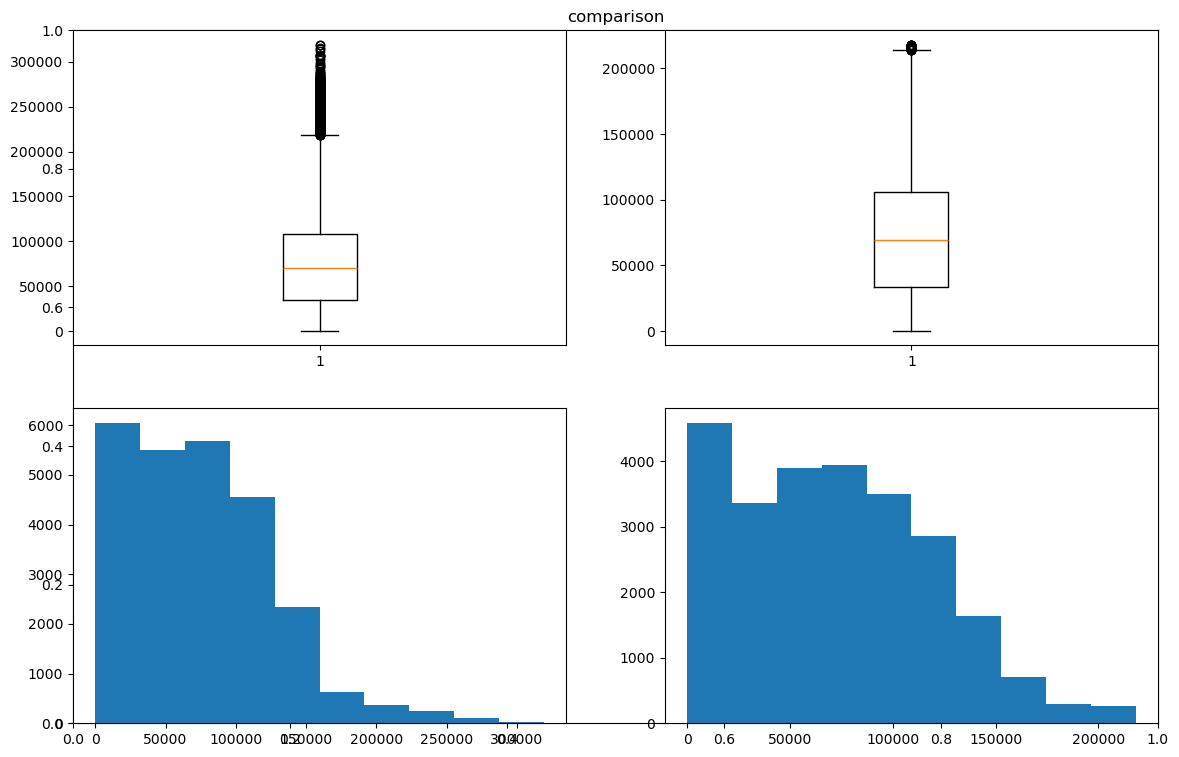

In [27]:
plt.figure(figsize=(14,9))
plt.title('comparison')
plt.subplot(2,2,1).boxplot(df['prevailing_wage'])
plt.subplot(2,2,2).boxplot(non_outliners['prevailing_wage'])
plt.subplot(2,2,3).hist(df['prevailing_wage'])
plt.subplot(2,2,4).hist(non_outliners['prevailing_wage'])
plt.show()

**how to deal the outliners**
- **Method-1: Drop the outliners**
    - Drop the outliners is not a good idea
    - when you drop the outliners, data will be lost
    - for example here we are droping 427 rows
    - x% of 25480= 427
    - it is 1.7% of the data, here it is fine to drop the outliners
    
- **method-2: fill with median values**

- **method-3: cap the values with Q1 and Q3**
    - all the less than lower bound values, we can replace with q1 or LB
    - all the greater than upper bound values, we can replace with q3 or UB

- **Fill with median**
    - create an empty list
    - calculate median value: df['prevailing_wage'].median()
    - iterate trough df['prevailing_wage'].values()
    - if each value i.e. i, UB then append with median values
    - else append with i value

{'whiskers': [<matplotlib.lines.Line2D at 0x24a97637510>,
 'caps': [<matplotlib.lines.Line2D at 0x24a94b8ab10>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a97636150>],
 'medians': [<matplotlib.lines.Line2D at 0x24a97645e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a97647550>],
 'means': []}

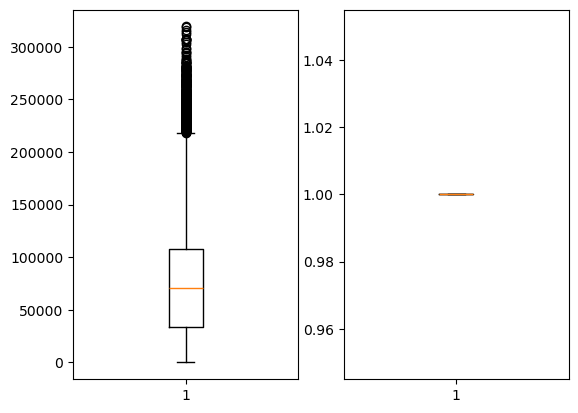

In [31]:
Q1= np.percentile(df['prevailing_wage'],25)
Q3= np.percentile(df['prevailing_wage'],75)
IQR = Q3-Q1
LB = Q1-1.5*IQR
UB = Q3+1.5*IQR
l1=[]
median = df['prevailing_wage'].median()
values = df['prevailing_wage'].values
for value in df['prevailing_wage'].values:
    if value <LB or value > UB:
        l1.append(median)
    else:
        l1.append(value)
df_copy = df.copy()
df_copy['prevailing_wage']=1
plt.subplot(1,2,1).boxplot(df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(df_copy['prevailing_wage'])

In [28]:
for value in df['prevailing_wage'].values:
    print(value)

592.2029
83425.65
122996.86
83434.03
149907.39
78252.14
53635.39
418.2298
74362.19
67514.76
83588.56
70813.09
28663.05
107196.03
220081.73
74108.02
3706.79
16132.61
150441.13
79948.12
71128.98
137694.98
45642.39
90108.38
71286.04
99489.65
86332.95
103029.33
40925.86
189190.48
79594.12
135866.13
72077.57
81921.18
225569.73
92421.92
2490.12
110817.26
50960.01
125336.9
39633.32
156326.33
43630.58
54614.42
28989.87
22924.91
61567.75
156251.17
86022.02
49565.37
66191.41
95623.2
115014.05
35018.04
230.8072
113799.64
85854.09
14174.04
47176.84
4949.28
67410.59
58791.58
103.2216
62591.57
102919.59
123468.56
82324.64
5319.49
153019.94
38059.89
230.327
61521.92
121316.5
122540.55
47170.76
330.3743
2927.34
107781.48
590.0203
194176.83
102073.81
113882.38
70778.82
84125.48
174014.59
34213.17
79813.05
113327.34
78893.64
140290.16
111926.01
125880.21
527.8901
49357.95
69335.2
99737.18
91449.62
34494.86
395.995
159645.51
28243.79
43421.88
80253.78
115235.95
95200.86
41613.52
64137.41
66295.43
97520.0